Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


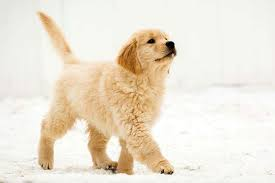

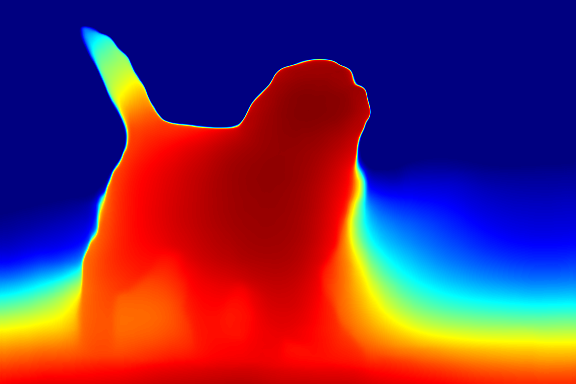

error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [2]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
from google.colab.patches import cv2_imshow
# Загрузка предобученной модели MiDaS
model_type = "DPT_Large"  # Вы можете использовать "DPT_Hybrid" или "MiDaS_small"
model = torch.hub.load("intel-isl/MiDaS", model_type)
model.eval()

# Определение преобразований для входного изображения
transform = transforms.Compose([
    transforms.Resize(384),  # Измените размер в зависимости от модели
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def predict_depth(image_path):
    # Загрузка и преобразование изображения
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)

    # Прогнозирование глубины
    with torch.no_grad():
        depth_map = model(input_tensor)

    # Нормализация карты глубины
    depth_map = depth_map.squeeze().cpu().numpy()
    depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())  # Нормализация

    return depth_map

def visualize_depth(depth_map):
    # Визуализация карты глубины
    depth_map = (depth_map * 255).astype(np.uint8)  # Преобразование в 8-битное изображение
    depth_color = cv2.applyColorMap(depth_map, cv2.COLORMAP_JET)  # Применение цветовой карты
    return depth_color

if __name__ == "__main__":
    image_path = "/content/a dog.jpg"  # Укажите путь к вашему изображению
    depth_map = predict_depth(image_path)
    depth_color = visualize_depth(depth_map)

    # Отображение оригинального изображения и карты глубины
    original_image = cv2.imread(image_path)
    cv2_imshow( original_image)
    cv2_imshow(depth_color)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
